In [16]:
# source: https://www.kaggle.com/datasets/martinellis/synthetic-lego-images/

import cv2
import torch
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from lib.lego_dataset import SynthentcLegoImagesWithMasksDataset

DATA_ROOT = Path('./datasets/synthetic-lego-images/versions/4/')

device = torch.device('cuda')

In [17]:
train_dataset = SynthentcLegoImagesWithMasksDataset(DATA_ROOT, 'train', remove_missing_labels=True) #, SynthentcLegoImagesWithMasksDataset.get_transform_train())
# valid_dataset = SynthentcLegoImagesWithMasksDataset(DATA_ROOT, 'valid') #, SynthentcLegoImagesWithMasksDataset.get_transform_valid())

# def collate_fn(batch):
#     return tuple(zip(*batch))

# train_data_loader = DataLoader(
#     train_dataset,
#     batch_size=4,
#     shuffle=True,
#     num_workers=4,
#     collate_fn=collate_fn
# )

# valid_data_loader = DataLoader(
#     valid_dataset,
#     batch_size=4,
#     shuffle=False,
#     num_workers=4,
#     collate_fn=collate_fn
# )

# x = train_dataset._get(0)

In [18]:
# x[1].shape

In [19]:
# images, targets = next(iter(valid_data_loader))

# plt.figure(figsize=(20,40))
# for i, (image, target) in enumerate(zip(images, targets)):
#     plt.subplot(4,2, i+1)
#     boxes = target['boxes'].cpu().numpy().astype(np.int32)
#     sample = image.permute(1,2,0).cpu().numpy()
#     names = target['labels'].astype(np.int64)
#     for i,box in enumerate(boxes):
#         cv2.rectangle(sample,
#                       (box[0], box[1]),
#                       (box[2], box[3]),
#                       (0, 0, 1), 2)
#         cv2.putText(sample, train_dataset.classes[names[i]], (box[0],box[1]+15),cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,1,0),1,cv2.LINE_AA)  

#     plt.axis('off')
#     plt.imshow(sample)


In [20]:

# plt.figure(figsize=(20,40))
# for i, (image, target, mask) in enumerate(zip(images, targets, masks)):
#     plt.subplot(4,2, i+1)
#     sample = np.array(mask).transpose(1,2,0)
#     plt.axis('off')
#     plt.imshow(sample)


In [21]:
# mask_reshaped = mask.permute(1, 2, 0).reshape(-1, 3)
# objects = torch.unique(mask_reshaped, dim=0)[1:]

# plt.figure(figsize=(20,20))
# for n, object_color in enumerate(objects):
#     plt.subplot(10, 10, n+1)
#     object_mask = (mask_reshaped == object_color)
#     object_mask = object_mask.all(dim=-1).reshape(mask.shape[1:])

#     empty = torch.zeros((mask.shape[1], mask.shape[2], mask.shape[0]), dtype=mask.dtype)
#     empty[object_mask, :] = object_color

#     plt.axis('off')
#     _ = plt.imshow(empty.cpu().numpy())

In [22]:
image, masks, target = train_dataset._get(0)
target

Cannot find segmentation mask for label 5 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_81.png, removing label from target
Cannot find segmentation mask for label 8 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_81.png, removing label from target
Cannot find segmentation mask for label 19 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_81.png, removing label from target
Cannot find segmentation mask for label 23 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_81.png, removing label from target
Cannot find segmentation mask for label 31 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_81.png, removing label from target
Cannot find segmentation mask for label 50 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_81.png, removing label from target


{'image_id': 0,
 'image_fn': 'datasets/synthetic-lego-images/versions/4/images/rgb_81.png',
 'boxes': tensor([[208., 152., 233., 168.],
         [229., 188., 246., 205.],
         [252., 194., 270., 211.],
         [145., 184., 181., 211.],
         [205., 181., 235., 214.],
         [155., 200., 175., 222.],
         [340., 205., 359., 226.],
         [287., 206., 314., 226.],
         [231., 230., 233., 231.],
         [162., 212., 271., 233.],
         [ 94., 207., 133., 234.],
         [ 50., 225.,  72., 242.],
         [189., 223., 208., 243.],
         [303., 238., 320., 251.],
         [388., 186., 483., 253.],
         [101., 225., 174., 256.],
         [187., 226., 257., 265.],
         [427., 230., 461., 266.],
         [150., 257., 157., 266.],
         [100., 174., 126., 266.],
         [408., 249., 440., 274.],
         [316., 256., 368., 278.],
         [104., 259., 126., 279.],
         [284., 272., 304., 283.],
         [335., 241., 369., 285.],
         [237., 237., 29

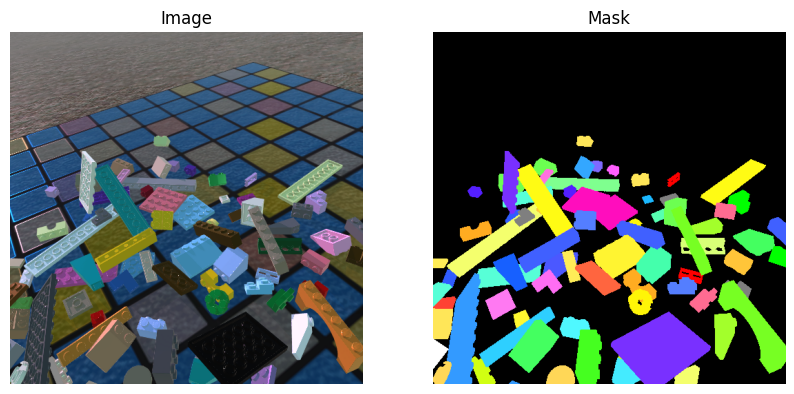

In [23]:
mask_image = cv2.cvtColor(cv2.imread(target['mask_fn'], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
axs = plt.subplot(1, 2, 1)
axs.set_title('Image')
axs.imshow(image.permute(1, 2, 0).numpy())
plt.axis('off')
axs = plt.subplot(1, 2, 2)
axs.set_title('Mask')
axs.imshow(mask_image)
_ = plt.axis('off')

In [24]:
img_colors = set([tuple(x) for x in np.unique(mask_image.reshape(-1, 3), axis=0)[1:].tolist()])
mask_colors = {tuple(clr.tolist()): id for id, clr in train_dataset.class_colors.items() if id in target['labels']}
diff = img_colors.difference(mask_colors)
diff

{(23, 96, 255),
 (51, 154, 255),
 (127, 127, 127),
 (209, 255, 18),
 (255, 65, 51),
 (255, 249, 48)}

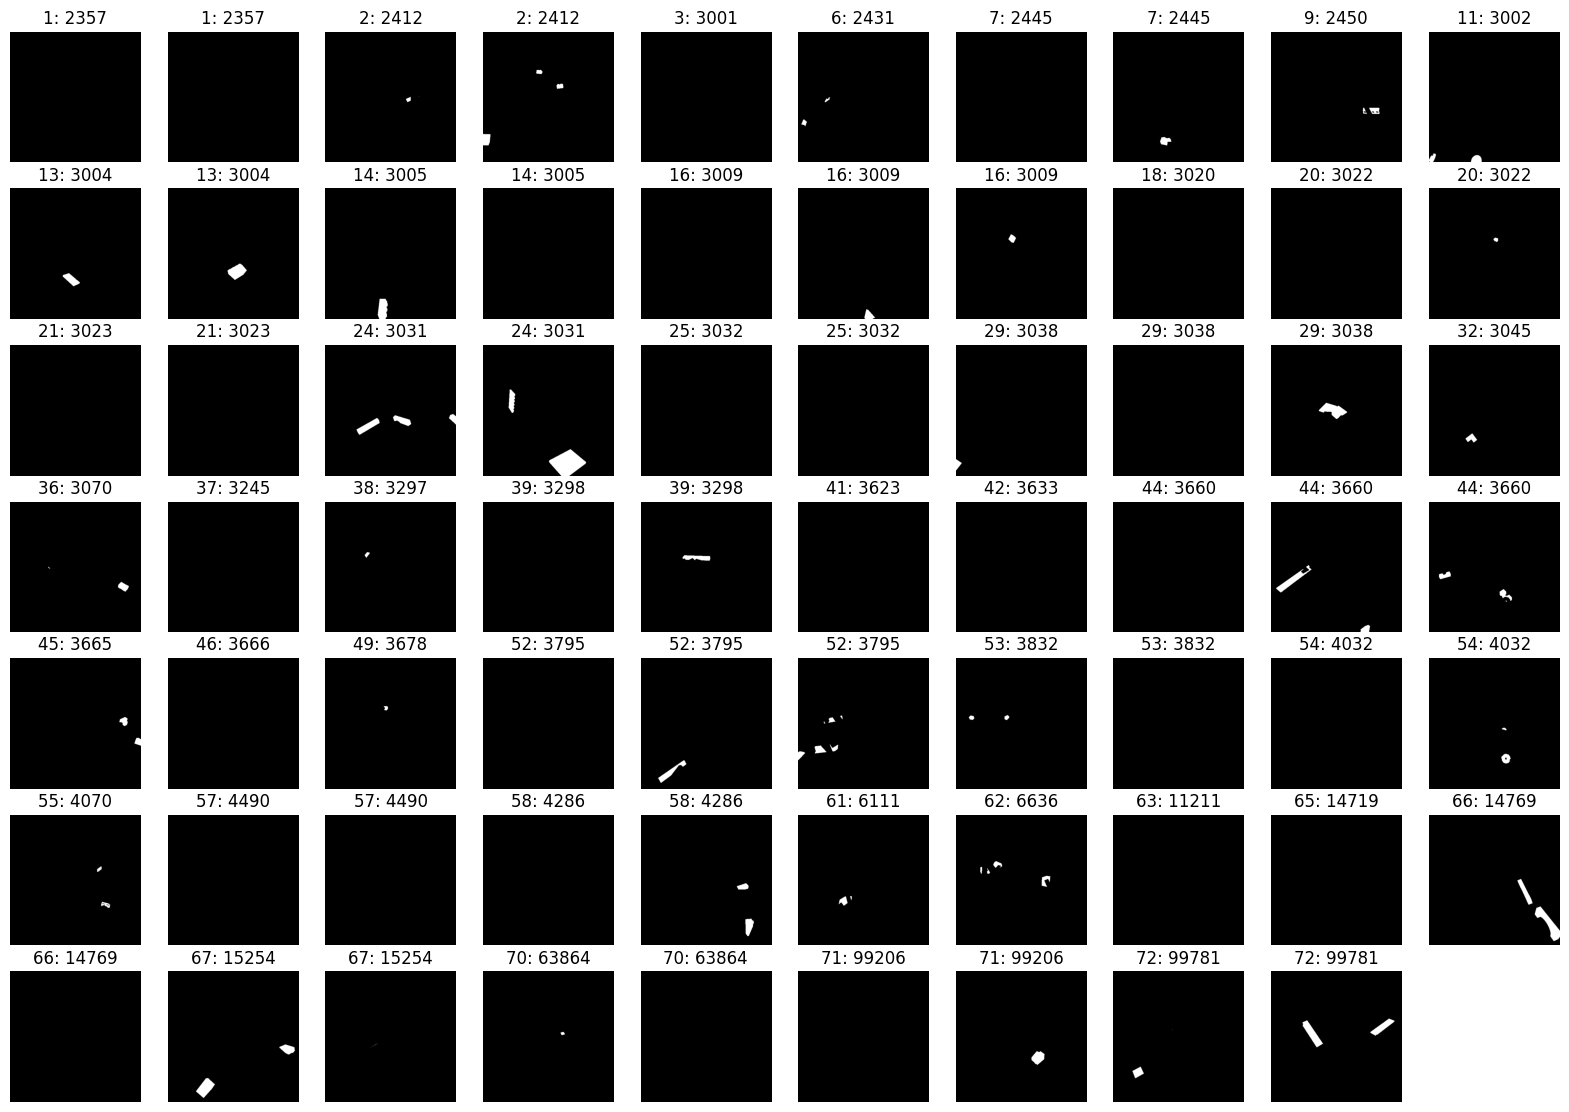

In [25]:
plt.figure(figsize=(20,20))
for n, (m, lbl) in enumerate(sorted(zip(masks, target['labels']), key=lambda x: x[-1])):
    axs = plt.subplot(10, 10, n+1)
    axs.axis('off')
    axs.set_title(f'{lbl}: {train_dataset.classes[lbl]}')
    axs.imshow(m, cmap='gray')

In [26]:
m.any()

tensor(True)